# Predicting heart disease using machine learning

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Expreimentation

## preparing the tools

In [1]:
# Importing tools 

# Regular EDA (exploratory data analysis) & plotting llibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-learn 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

## Load data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df.shape # in form of (rows, columns)

(303, 14)

## Data exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data & become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to answer?
2. What kind of data do we have & how do we treat different types?
3. What's missing from the data & how do you deal with it?
4. Where are the outliers & why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
# Let's find out how many of each class are there
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

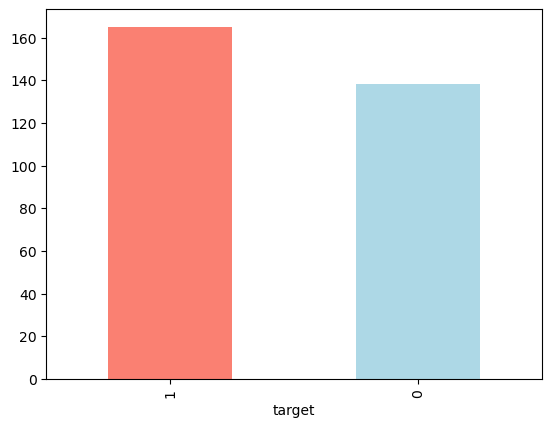

In [4]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Heart Disease frequency according to sex

In [8]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


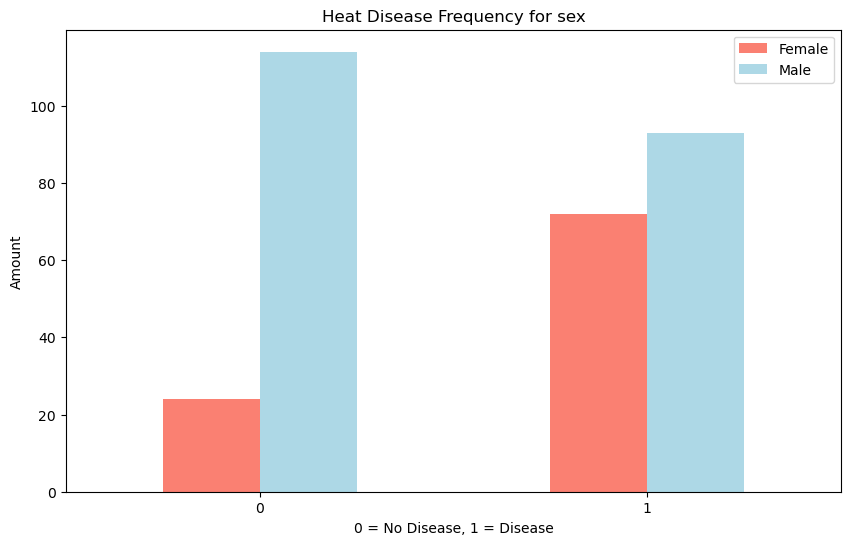

In [10]:
# Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])
plt.title('Heat Disease Frequency for sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Age vs. Max Heart Rate for Heart Disease

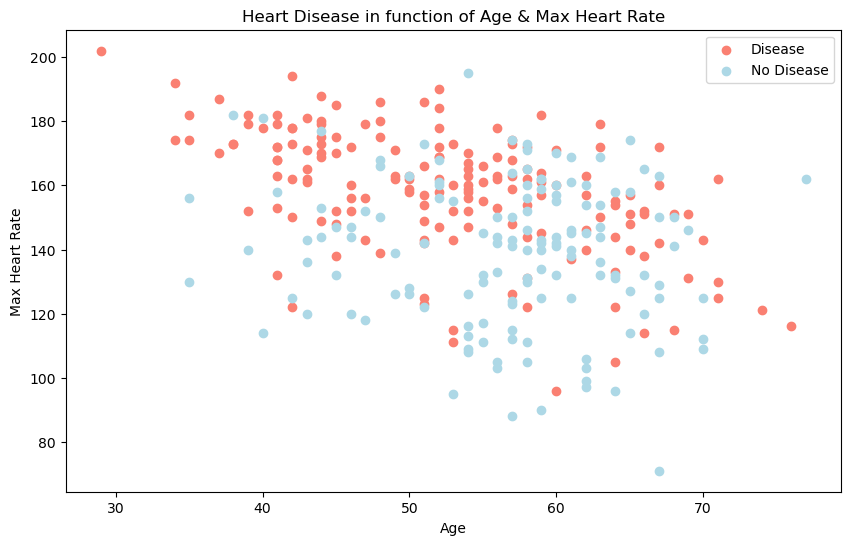

In [11]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(
    df['age'][df['target'] == 1],
    df['thalach'][df['target'] == 1],
    c='salmon'
)

# Scatter with negative examples
plt.scatter(
    df.age[df.target == 0], # df.age is the same as df['age']
    df.thalach[df.target == 0],
    c='lightblue'
)

plt.title('Heart Disease in function of Age & Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No Disease'])

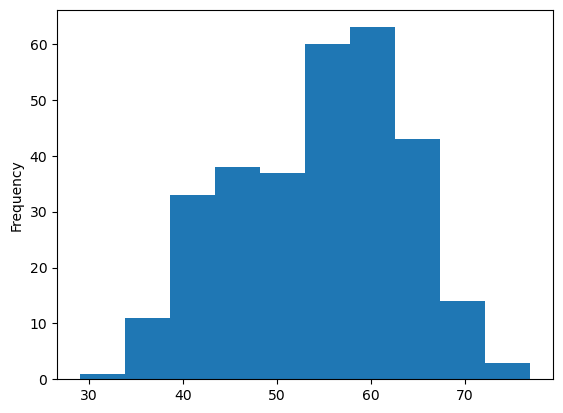

In [12]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

In [13]:
### Heart disease Frequency per Chest Pain Type

pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

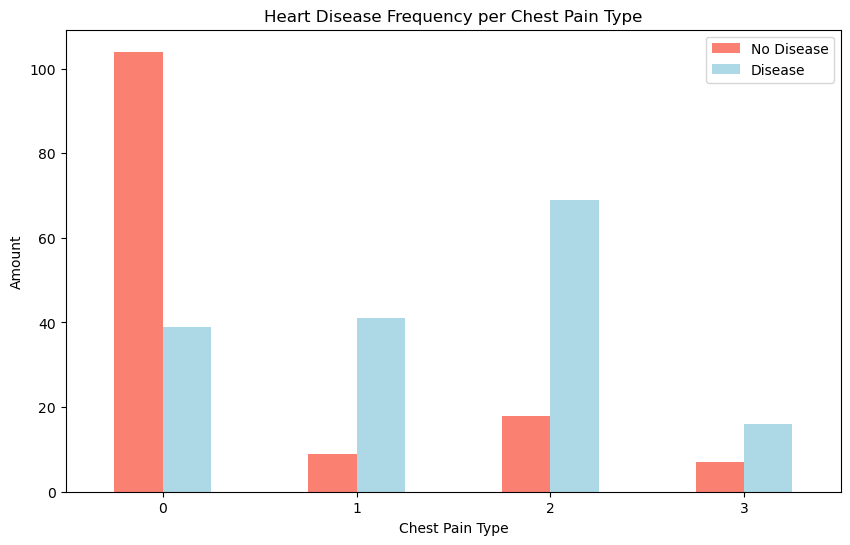

In [14]:
# Make the crosstab more visual

pd.crosstab(df.cp, df.target).plot(kind='bar', figsize=(10, 6), color=['salmon', 'lightblue'])
plt.title('Heart Disease Frequency per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease'])
plt.xticks(rotation=0)

In [15]:
# Make a corretion matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


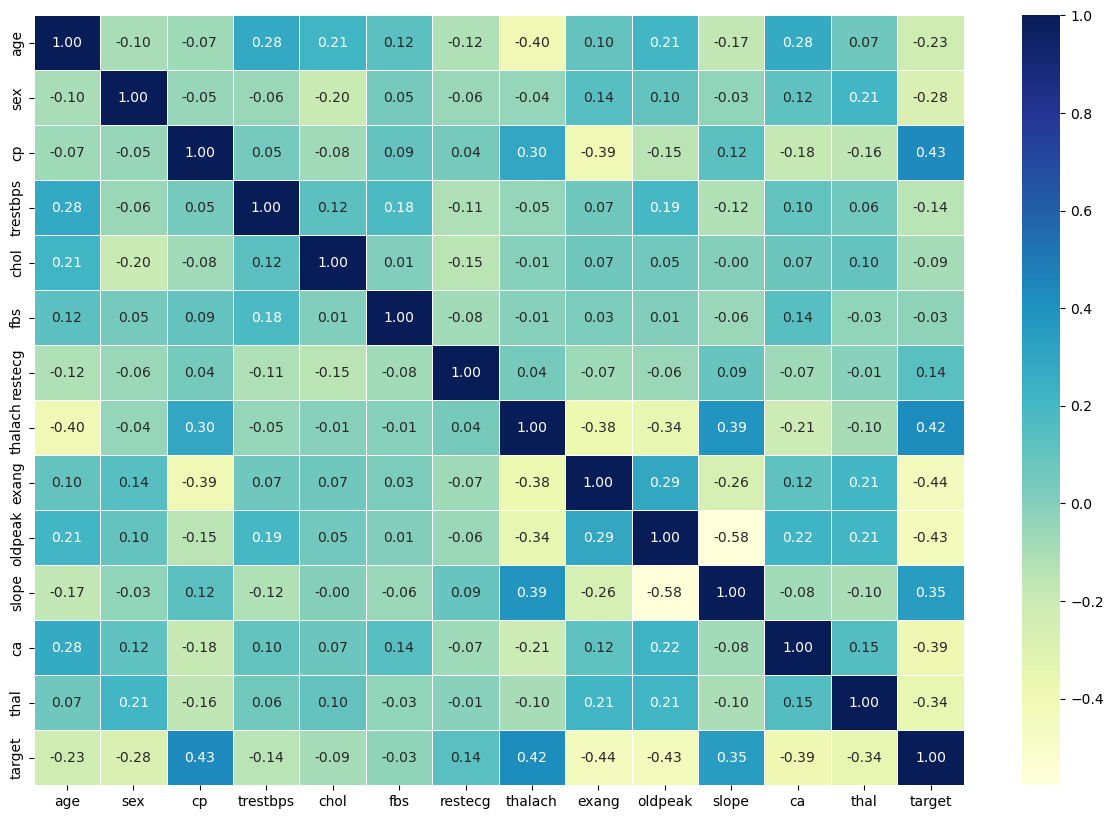

In [16]:
# Let' smake our correlatin matrix prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, cmap='YlGnBu', fmt='.2f')

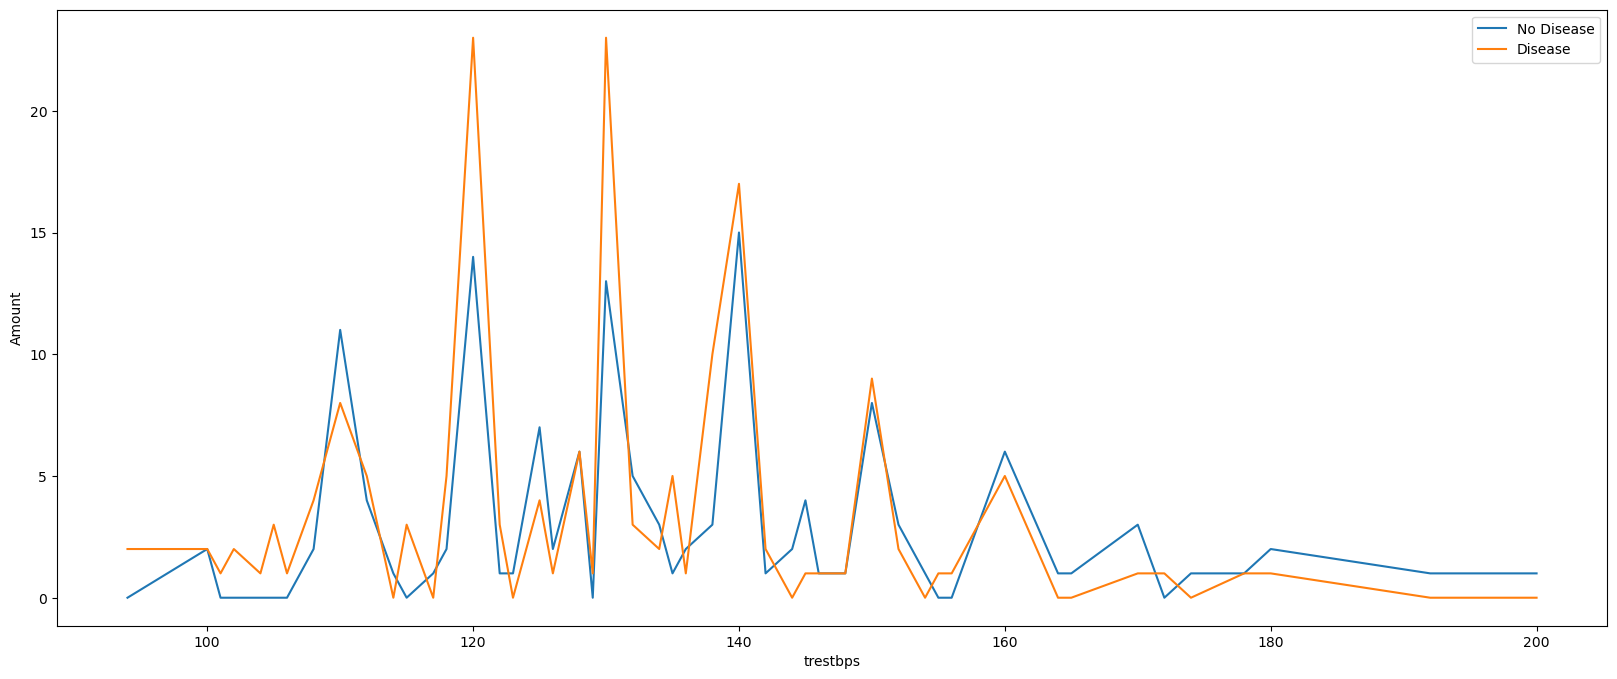

In [17]:
pd.crosstab(df.trestbps, df.target).plot(kind='line', figsize=(20, 8))
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease']);
# More trestbps (rest blood pressure) = less disease
# Referring to the Correlation matrix, the correlation between trestbps feature and target is -0.14

## 5. Modelling

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Split data into X and y
X = df.drop('target', axis=1)
y = df.target

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Put models in dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: dictionary of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    """

    np.random.seed(42)

    model_scores = {} # Dic to keep the model's scores

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [21]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

### Model comparison


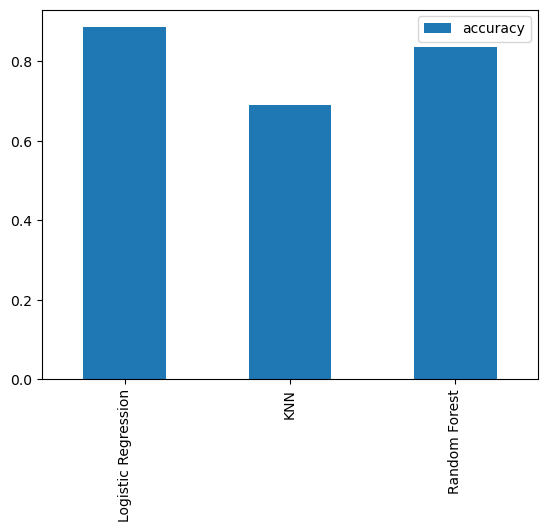

In [22]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

### Hyperparameter tuning

In [23]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 75.41%


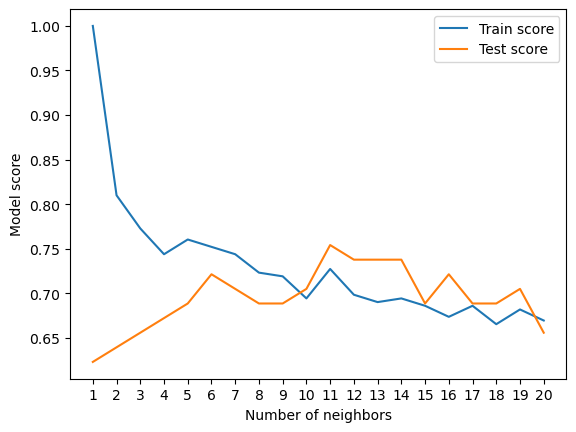

In [24]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: { round(max(test_scores)*100, 2) }%')

## Hyperparameter tuning with `RandomizedSearchCV`

In [25]:
# Create a hyperparameter grid for LogisticRegression
log_req_grid = {
    'C': np.logspace(-4, 4, num=20), 
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
}

# Create a hyperparameter for RandomForestClassifier
rf_grid = {
    'n_estimators': np.arange(10, 1000, 50), 
    'max_depth': [None, 3, 5, 10], 
    'min_samples_split': np.arange(2, 20, 2), 
    'min_samples_leaf': np.arange(1, 20, 2)
}

In [26]:
# Tune LogisticRegression

np.random.seed(42)

rs_log_req = RandomizedSearchCV(LogisticRegression(), param_distributions=log_req_grid, cv=5, n_iter=20, verbose=2)

rs_log_req.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.0s
[CV] END .................C=0.08858667904100823, solver=saga; total time=   0.0s
[CV] END .................C=0.08858667904100823, solver=saga; total time=   0.0s
[CV] END .................C=0.08858667904100823, solver=saga; total time=   0.0s
[CV] END .................C=0.08858667904100823, solver=saga; total time=   0.0s
[CV] END .................C=0.08858667904100823, solver=saga; total time=   0.0s
[CV] END ...............................C=0.0001, solver=sag; total time=   0.0s
[CV] END ...............................C=0.000

C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

[CV] END ...........C=0.004832930238571752, solver=newton-cg; total time=   0.0s
[CV] END ....................C=1.623776739188721, solver=sag; total time=   0.0s
[CV] END ....................C=1.623776739188721, solver=sag; total time=   0.0s
[CV] END ....................C=1.623776739188721, solver=sag; total time=   0.0s
[CV] END ....................C=1.623776739188721, solver=sag; total time=   0.0s
[CV] END ....................C=1.623776739188721, solver=sag; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END .............C=11.288378916846883, solver=liblinear; total time=   0.0s
[CV] END ...............C=0.00026366508987303583, solver=sag; total time=   0.0s
[CV] END ...............C=0.

C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

[CV] END ..............C=0.0018329807108324356, solver=lbfgs; total time=   0.0s
[CV] END ..............C=0.0018329807108324356, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=newton-cg; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=newton-cg; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=newton-cg; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=newton-cg; total time=   0.0s
[CV] END ..............C=1.623776739188721, solver=newton-cg; total time=   0.0s
[CV] END ..............C=0.00026366508987303583, solver=saga; total time=   0.0s
[CV] END ..............C=0.00026366508987303583, solver=saga; total time=   0.0s
[CV] END ..............C=0.00026366508987303583, solver=saga; total time=   0.0s
[CV] END ..............C=0.00026366508987303583, solver=saga; total time=   0.0s
[CV] END ..............C=0.00026366508987303583, solver=saga; total time=   0.0s
[CV] END ................C=0

C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

[CV] END ................C=0.03359818286283781, solver=lbfgs; total time=   0.0s
[CV] END ................C=0.03359818286283781, solver=lbfgs; total time=   0.0s
[CV] END ...................C=78.47599703514607, solver=saga; total time=   0.0s
[CV] END ...................C=78.47599703514607, solver=saga; total time=   0.0s
[CV] END ...................C=78.47599703514607, solver=saga; total time=   0.0s
[CV] END ...................C=78.47599703514607, solver=saga; total time=   0.0s
[CV] END ...................C=78.47599703514607, solver=saga; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ...............C=206.913808111479, solver=liblinear; total time=   0.0s
[CV] END ..............C=379

C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ikianm\Desktop\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['lbfgs', 'liblinear',
                                                   'newton-cg',
                                                   'newton-cholesky', 'sag',
                                                   'saga']},
                   verbose=2)

In [27]:
# Find the best hyperparameter
rs_log_req.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [28]:
rs_log_req.score(X_test, y_test)

0.8688524590163934

In [29]:
# Tune RandomForestClassifier

np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=25, verbose=2)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510; total time=   0.5s
[CV] END max_de

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=2)

In [30]:
# Find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [31]:
rs_rf.score(X_test, y_test)

0.8688524590163934

## Hyperparameters Tuning using `GridSearchCV`

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [32]:
# Different hyperparameters for our LogisticRegression model
lg_reg_grid = {
    'C': np.logspace(-4, 4, 30),
    'solver': ['liblinear']
}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=lg_reg_grid, cv=5, verbose=True)

# Fit our grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [33]:
# Check the best parameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [34]:
# Evaluate the grid search model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Evaluating our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score
... and it would be great if cross-validation was used where possible

To make comparisons and evaluate our trained model, first we need to make predictions.

In [35]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

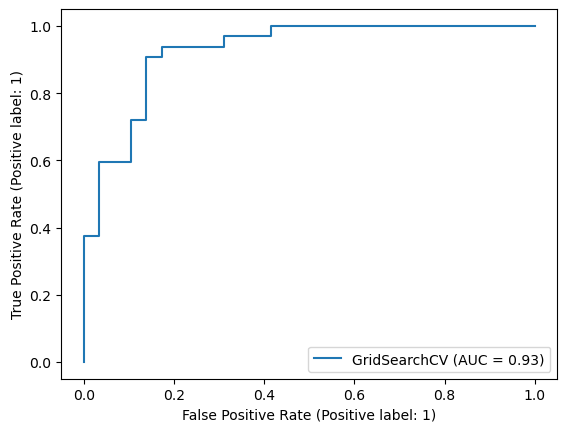

In [36]:
# Ploc ROC curve and calculate AUC metric
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(gs_log_reg, X=X_test, y=y_test, ax=ax);

In [37]:
# confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


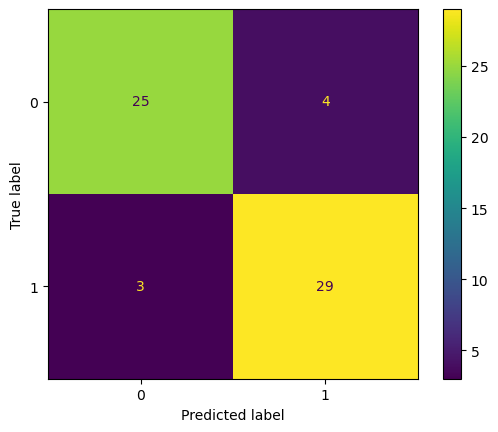

In [38]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds)).plot();

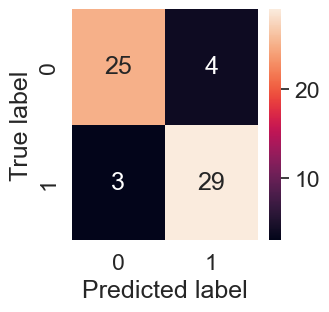

In [39]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_true, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_true, y_preds), annot=True)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

plot_conf_mat(y_test, y_preds)

In [40]:
# classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

In [41]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [42]:
# Create the best classifier with best params
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [43]:
# Cross-validated accuracy 
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [44]:
# Cross-validated precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [45]:
# Cross-validated recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [46]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

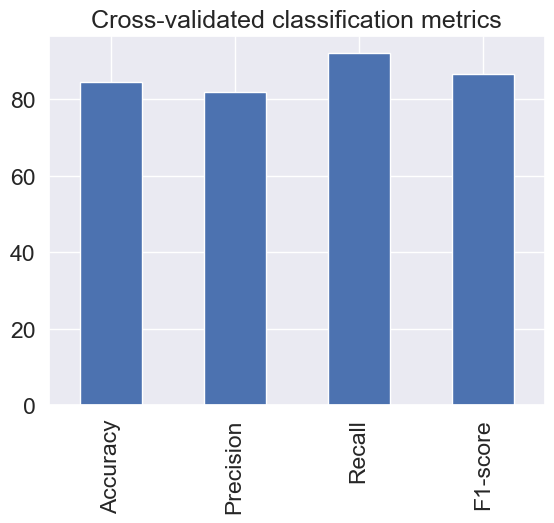

In [47]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    'Accuracy': round(cv_acc * 100, 2),
    'Precision': round(cv_precision * 100, 2),
    'Recall': round(cv_recall * 100, 2),
    'F1-score': round(cv_f1 * 100, 2)
}, index=['%'])
cv_metrics.T.plot(kind='bar', title='Cross-validated classification metrics', legend=False);

### Feature importance

In [51]:
# Fit an instance of LogisticRegression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

clf.fit(X_train, y_train);

In [52]:
# Check coef_
clf.coef_

array([[ 0.00316728, -0.86044651,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275847,  0.02459361, -0.6041308 , -0.56862804,
         0.45051628, -0.63609897, -0.67663373]])

In [54]:
# Match coef's of feature to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672801993431563,
 'sex': -0.8604465072345515,
 'cp': 0.6606704082033799,
 'trestbps': -0.01156993168080875,
 'chol': -0.001663744504776871,
 'fbs': 0.043861071652469864,
 'restecg': 0.31275846822418324,
 'thalach': 0.024593613737779126,
 'exang': -0.6041308000615746,
 'oldpeak': -0.5686280368396555,
 'slope': 0.4505162797258308,
 'ca': -0.6360989676086223,
 'thal': -0.6766337263029825}

<Axes: title={'center': 'Feature Importance'}>

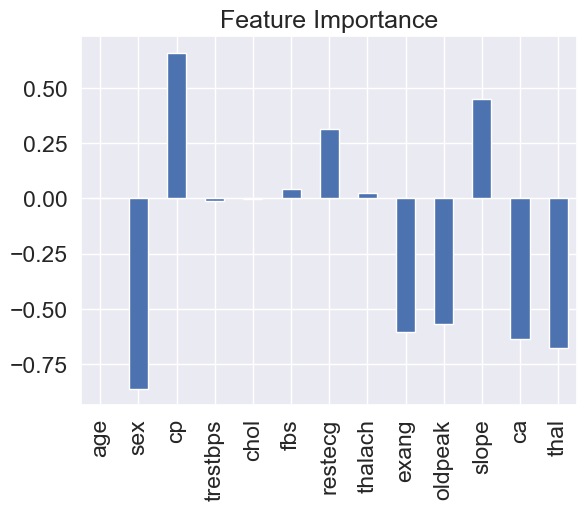

In [73]:
# Visual feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot(kind='bar', title='Feature Importance', legend=False)


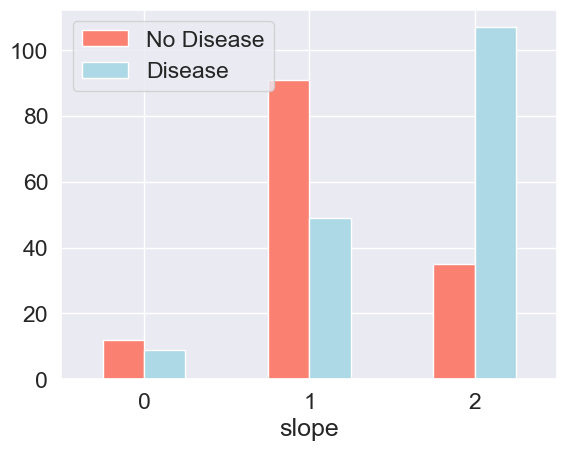

In [65]:
pd.crosstab(df.slope, df.target).plot(kind='bar', color=['salmon', 'lightblue'])
plt.xticks(rotation=0)
plt.legend(['No Disease', 'Disease'], loc='upper left');